In [23]:
import ROOT, rat
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 

import jp_mpl as jplot

from matplotlib.colors import LogNorm
import pickle
import ratdb_reader
reload(ratdb_reader)
from copy import deepcopy

In [2]:
# Airplane mode
db = rat.RAT.DB.Get()
db.SetAirplaneModeStatus(True)
db.SetDefaultPlaneLockStatus(False)
print 'This is AIRPLANE MODE - be careful!'

This is AIRPLANE MODE - be careful!


TClass::TClass:0: RuntimeWarning: no dictionary for class RAT::DBTableKey is available


In [214]:
infiles = \
[['Data_102529', '/home/jpyanez/snoplus/data/SOC_files/SOC_0000102529.root'],
 ['MC_105529', '/home/jpyanez/snoplus/rundir/laserball_runmc/stdgeo/LB_420nm_center_102529.root'],
 ['MC_default', '/home/jpyanez/snoplus/rundir/laserball_runmc/stdgeo/LB_420nm_center_generic.root'],
 ['MC_modGV', '/home/jpyanez/snoplus/rundir/laserball_runmc/stdgeo/LB_420nm_center_generic_newgvel.root'],
 ['MC_modGV_offcentre', '/home/jpyanez/snoplus/rundir/laserball_runmc/stdgeo/LB_420nm_center_generic_newgvel_offzaxis.root']]

In [52]:
def plotPMTtoa(time_array,
               bin_width   = 1., # in ns
               time_window = 400.,
               start_time  = -100,
               plot = False):

    residual_axis = np.arange(start_time, time_window + start_time+ bin_width/2., bin_width)

    counts, x = np.histogram(time_array, residual_axis)
    #print residual_axis.size
    
    if plot:
        print mytime

        plt.figure(figsize=(10,6))
        plt.plot(mytime+residual_axis[counts.argmax()]-mytime[mylatep.argmax()], 
                 mylatep*counts.max()*1./mylatep.max(), '--k')

        jplot.unfilledBar(residual_axis, counts)
        plt.xlabel('Time of arrival (ns)', fontsize='x-large')
        plt.ylabel('Counts')
        plt.yscale('log')
        
    return counts, x

In [224]:
#toa = np.zeros()
toa = np.zeros([9800, 400])
toa_all = []
for iEntry in range(len(infiles)):

    # Get the soc object
    reader = rat.socreader(infiles[iEntry][1])
    soc, run = reader.next()
    print 'RUN info'
    print 'manip position', np.array(soc.calib.GetPos())
    #print 'socfit position', np.array(soc.GetFitResult(soc.GetFitNames()[0]).GetVertex(0).GetPosition())
    #print 'wavelength', soc.calib.GetMode()
    
    for one_pmt in soc.GetSOCPMTIDs():
        if one_pmt % 300 == 0:
            print one_pmt
        time_array = soc.GetSOCPMT(one_pmt).GetTimes()
        toa[one_pmt, :], toa_edges = plotPMTtoa(time_array,
                                               start_time=300)
    
    toa_all.append(deepcopy(toa))


RUN info
manip position [   0. -254.   25.]
0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
RUN info
manip position [  10.        -224.          -3.5999999]
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
RUN info
manip position [  10.        -224.          -3.5999999]
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7800
8100
8400
8700
9000
9300
9600
RUN info
manip position [  10.        -224.          -3.5999999]
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7800
8100
8400
8700
9000
9300
9600
RUN info
manip position [  10. -224.  644.]
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000


In [143]:
import ratdb_reader
reload(ratdb_reader)
infile_name = '/home/jpyanez/snoplus/software/rat/data/PMTTRANSIT.ratdb'
dbdata = ratdb_reader.dbreader(infile_name)
from scipy import interpolate
lpfcn = interpolate.InterpolatedUnivariateSpline(dbdata['r1408']['x'][1:], 
                                                 dbdata['r1408']['y'][1:] - dbdata['r1408']['y'][:-1])

reader: Creating a dict in line 4
reader: Closing a dict in line 17
reader: Creating a dict in line 19
reader: Closing a dict in line 34


In [222]:
len(toa_all)

2

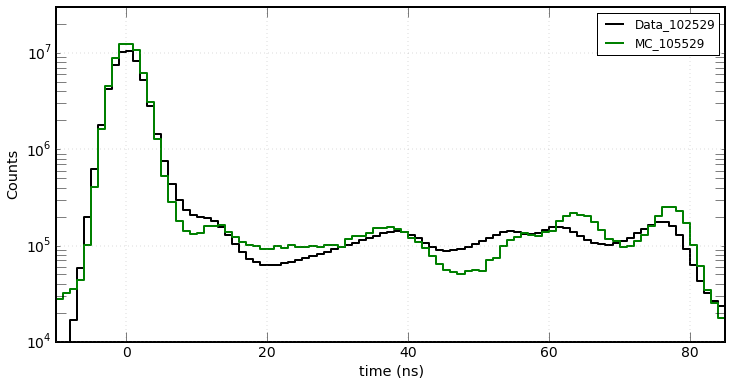

In [252]:
fig = plt.figure(figsize=(12,6))
datamax = toa_all[0].sum(axis=0).max()
colors = ['k','g','r','c','m','y','k']

for i, one_toa in enumerate(toa_all):
    if i >1 or i > 2 or i > 3:
        continue
    projection = one_toa.sum(axis=0)
    
    #jplot.unfilledBar(toa_edges-toa_edges[projection.argmax()], 
    #                                      projection*datamax/projection.max(), 
    #                  label = infiles[i][0], color = colors[i])
    scale=1.
    if i > 0:
        scale=100.
    jplot.unfilledBar(toa_edges-toa_edges[projection.argmax()], 
                                          projection*scale, 
                      label = infiles[i][0], color = colors[i])
    #if i == 1:
    #    break

#mytime  = np.linspace(-10, 80, 1001)
#mylatep = lpfcn(mytime)
#plt.plot(mytime, mylatep*datamax/mylatep.max())
#print mylatep.max()

# These are the actual peaks
#plt.axvline(x=54.5, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='--')
#plt.axvline(x=61.5, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='--')
#plt.axvline(x=76., ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='--')

# These are the peaks in mc expected
#for peak in mc_peaks:
#    plt.axvline(x=peak, ymin=0, ymax=1, linewidth=2, color = 'r', linestyle='--')

#for peak in mc_fast:
#    plt.axvline(x=peak, ymin=0, ymax=1, linewidth=2, color = 'c', linestyle='--')
    
#for peak in data_peaks:
#    plt.axvline(x=peak, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='--')
    
#for peak in slow_peaks:
#    plt.axvline(x=peak, ymin=0, ymax=1, linewidth=2, color = 'g', linestyle='--')

#x = np.linspace(0, 40, 101)
#y = x*(-1.5/30) + 4.8
#plt.plot(40. + x,10**y, '--b')

#x = np.linspace(0, 40, 41)
#y = 10**(x*(-1.5/30) + 4.8)[:-1]
#jplot.unfilledBar(x+40.,y)

plt.yscale('log')
plt.xlim(-10, 85)
plt.ylim(10**4, 3*10**7)
plt.legend(loc=0)
plt.xlabel('time (ns)', fontsize='x-large')
plt.ylabel('Counts', fontsize='x-large')




(array([   0.,    2.,    1.,    0.,    2.,    1.,    0.,    2.,    1.,
           0.,    1.,    1.,    1.,    0.,    0.,    2.,    0.,    4.,
           4.,    0.,    3.,    4.,    5.,    0.,    8.,   10.,    0.,
          11.,   12.,    0.,    9.,   23.,   23.,    0.,   21.,   23.,
           0.,   47.,   36.,    0.,   37.,   37.,   41.,    0.,   39.,
          54.,    0.,   60.,   57.,    0.,   57.,   61.,   61.,    0.,
          82.,   71.,    0.,   96.,   72.,    0.,   87.,  105.,   85.,
           0.,   87.,  102.,    0.,  119.,  109.,    0.,   88.,  106.,
         118.,    0.,  130.,  121.,    0.,  124.,  119.,    0.,  110.,
         121.,  111.,    0.,  113.,  135.,    0.,  112.,  121.,    0.,
         142.,  100.,  118.,    0.,  130.,   94.,    0.,  102.,  122.,
           0.,  117.,  106.,  102.,    0.,  106.,  131.,    0.,  118.,
         116.,    0.,  115.,  121.,  108.,    0.,  102.,  101.,    0.,
         111.,   92.,    0.,  111.,  109.,   82.,    0.,  100.,  120.,
      

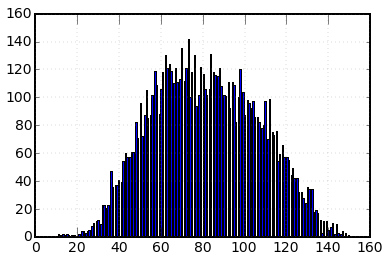

In [251]:
plt.hist(toa_all[1].sum(axis=1), np.linspace(10, 150, 201))

In [248]:
toa_all[0].sum()/toa_all[1].sum()

71.044122585643365

In [203]:
t = (6005. - 6011.4)/222.
print (2*6005.)/222., 2*t
print 50/222.

54.0990990991 -0.0576576576577
0.225225225225


In [ ]:
fig = plt.figure(figsize=(12,6))
datamax = toa_all[0].sum(axis=0).max()
colors = ['k','g','r','c','m','y','k']

for i, one_toa in enumerate(toa_all):
    if i == 1 or i == 2:
        continue
    projection = one_toa.sum(axis=0)
    
    if i == 3:
        x = np.linspace(0, 40, 41)
        y = 10**(x*(-1.5/1000) + 4.8)[:-1]
        #jplot.unfilledBar(x+40.,y)
        
        offset = 37
        
        counts = projection*datamax/projection.max()
        minindex = counts.argmax()
        counts[offset+minindex:offset+minindex+40] += 0.5*y
    
        jplot.unfilledBar(toa_edges-toa_edges[projection.argmax()], 
                      counts,
                      #projection*datamax/projection.max(), 
                      label = infiles[i][0], color = colors[i])
    else:
        jplot.unfilledBar(toa_edges-toa_edges[projection.argmax()], 
                                          projection*datamax/projection.max(), 
                      label = infiles[i][0], color = colors[i])
    #if i == 1:
    #    break

#mytime  = np.linspace(-10, 80, 1001)
#mylatep = lpfcn(mytime)
#plt.plot(mytime, mylatep*datamax/mylatep.max())
#print mylatep.max()

# These are the actual peaks
#plt.axvline(x=54.5, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='--')
#plt.axvline(x=61.5, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='--')
#plt.axvline(x=76., ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='--')

# These are the peaks in mc expected
#for peak in mc_peaks:
#    plt.axvline(x=peak, ymin=0, ymax=1, linewidth=2, color = 'r', linestyle='--')

#for peak in mc_fast:
    #plt.axvline(x=peak, ymin=0, ymax=1, linewidth=2, color = 'c', linestyle='--')
    
#for peak in data_peaks:
    #plt.axvline(x=peak, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='--')
    
#for peak in slow_peaks:
#    plt.axvline(x=peak, ymin=0, ymax=1, linewidth=2, color = 'g', linestyle='--')

#x = np.linspace(0, 40, 101)
#y = x*(-1.5/30) + 4.8
#plt.plot(40. + x,10**y, '--b')

#x = np.linspace(0, 40, 41)
#y = 10**(x*(-1.5/30) + 4.8)[:-1]
#jplot.unfilledBar(x+40.,y)

plt.yscale('log')
plt.xlim(-10, 85)
plt.ylim(10**4, 3*10**7)
plt.legend(loc=0)
plt.xlabel('time (ns)', fontsize='x-large')
plt.ylabel('Counts', fontsize='x-large')




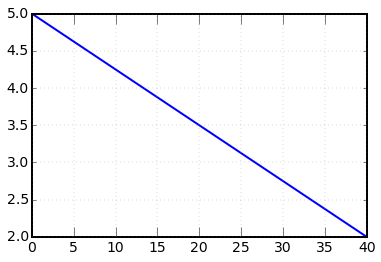

In [155]:
x = np.linspace(0, 40, 101)
y = x*(-1.5/20) + 5
plt.plot(x,y)

In [115]:
data_peaks = np.array([54.5, 61.5, 76.])
deltav = 0.025
slow_peaks = data_peaks*(1./(1-deltav))
print old_peaks

[ 55.8974359   63.07692308  77.94871795]


In [253]:
data_peaks - mc_peaks

array([-2. , -2.5, -1.5])

In [140]:
mc_peaks = np.array([56.5, 64., 77.5])
deltav = 0.025
mc_fast = mc_peaks*(1./(1+deltav))
print old_peaks

[ 55.8974359   63.07692308  77.94871795]


In [91]:
63.5*(1-1/1.025)

1.5487804878048723

In [ ]:
v = d/t